<a href="https://colab.research.google.com/github/nullvoid-j/Genre_Predection/blob/master/PCA_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [0]:
train_df=pd.read_pickle('/content/drive/My Drive/W2V_data.pkl')

In [4]:
train_df.head()

,File_Name,Labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,file_2180.txt,8,0.026030,0.053850,0.031157,0.082976,-0.050428,-0.022265,0.015499,-0.093369,0.045651,0.065126,-0.050108,-0.117466,-0.068988,0.014385,-0.120064,0.076775,0.048680,0.099385,0.006359,-0.050830,-0.035355,0.011413,0.065512,-0.004051,0.007009,-0.027803,-0.070451,0.045132,0.024129,-0.017637,-0.000208,0.049565,-0.050554,-0.018785,-0.015134,-0.016882,-0.012749,0.033074,...,0.007965,0.002200,-0.016236,-0.000496,0.034925,0.097254,-0.031293,0.001054,-0.033314,-0.020116,-0.003563,0.054891,0.069433,0.052968,0.081439,-0.059854,-0.064311,-0.121246,-0.061366,0.031658,0.015170,-0.011977,0.033287,0.052762,0.035091,0.022347,-0.059865,-0.007804,-0.000096,0.055750,-0.055360,0.050042,-0.094575,0.003591,-0.050739,-0.034826,-0.022226,-0.056523,-0.003866,0.037979
1,file_693.txt,4,0.031532,0.039416,0.027235,0.097791,-0.051051,-0.013889,0.030678,-0.086357,0.059299,0.057092,-0.038800,-0.117836,-0.025473,0.003175,-0.104359,0.058518,0.057677,0.100203,0.021025,-0.052475,-0.029337,0.056025,0.034598,-0.010478,0.035976,-0.021755,-0.083753,0.050640,0.025925,-0.008123,-0.012971,0.035129,-0.047084,-0.007687,-0.010895,-0.019059,0.007136,0.017589,...,0.000570,-0.019942,-0.051271,0.019855,0.044615,0.115115,-0.007668,-0.008343,-0.058669,-0.011660,0.022130,0.091780,0.101376,0.044632,0.049084,-0.064579,-0.051740,-0.114547,-0.043623,-0.005742,0.021031,-0.019303,0.019407,0.066636,0.023651,0.014666,-0.068253,-0.026797,0.006308,0.037723,-0.052646,0.041305,-0.099018,0.025254,-0.049540,-0.024865,0.011817,-0.042664,0.018226,-0.001231
2,file_2469.txt,6,0.039435,0.048108,0.032020,0.077340,-0.058529,-0.028177,0.014772,-0.101922,0.066824,0.075157,-0.040996,-0.113191,-0.014948,0.013920,-0.093375,0.029221,0.043471,0.096792,0.013772,-0.057453,-0.013528,0.041057,0.004652,-0.007475,0.022580,-0.040709,-0.083031,0.065429,0.037795,-0.020479,-0.027421,0.033718,-0.030996,-0.012734,-0.034274,-0.030574,-0.013113,0.027898,...,-0.005642,-0.012559,-0.056067,0.019430,0.040348,0.113947,-0.009250,0.002581,-0.047370,-0.023761,-0.012892,0.084635,0.076414,0.020662,0.059711,-0.066799,-0.066128,-0.102343,-0.040043,0.020816,0.001262,-0.003112,0.027132,0.059506,0.025894,0.026003,-0.069664,-0.007528,0.013288,0.011234,-0.045833,0.027084,-0.097117,0.013191,-0.059390,-0.019689,0.009537,-0.037960,-0.008471,0.003808
3,file_2542.txt,6,0.035127,0.038403,0.027353,0.086677,-0.045337,-0.032952,0.011887,-0.096415,0.047264,0.071092,-0.045134,-0.110416,-0.023438,0.016905,-0.105310,0.052946,0.051439,0.090013,0.005776,-0.049342,-0.026837,0.045070,0.029766,-0.007540,0.032752,-0.034635,-0.089908,0.061417,0.030437,-0.014902,-0.024497,0.025765,-0.049022,-0.018946,-0.027832,-0.026953,-0.001163,0.029639,...,-0.014495,-0.001855,-0.032269,0.012355,0.041808,0.111138,-0.022338,0.002007,-0.044793,-0.017266,-0.003066,0.067793,0.063722,0.031833,0.065315,-0.048797,-0.054747,-0.107683,-0.040042,0.006851,0.010820,-0.017212,0.016392,0.060107,0.032686,0.021023,-0.062278,-0.000325,0.013666,0.028172,-0.047634,0.038710,-0.092649,0.016813,-0.049076,-0.014993,0.000204,-0.046163,0.000499,0.014306
4,file_378.txt,16,0.028922,0.046426,0.012234,0.078231,-0.065092,-0.037975,0.020396,-0.098205,0.055722,0.064216,-0.039247,-0.106967,-0.012629,0.014837,-0.101280,0.036171,0.028471,0.089645,0.010373,-0.063205,-0.003885,0.057753,0.003371,-0.011883,0.041168,-0.032451,-0.076127,0.073824,0.051268,-0.022436,-0.028131,0.024508,-0.042662,-0.015265,-0.023641,-0.037512,-0.000318,0.009124,...,-0.000144,-0.003730,-0.059767,0.017502,0.051804,0.109751,-0.018978,-0.016736,-0.048425,-0.009086,-0.003349,0.082545,0.081079,0.035362,0.055661,-0.063469,-0.065370,-0.104800,-0.043744,0.013089,0.006269,-0.004782,0.035923,0.056368,0.026225,0.004715,-0.065687,-0.011004,0.022445,0.018

In [0]:
labels=train_df.iloc[:,1]
data=train_df.iloc[:,2:]

In [11]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(scaled_data)
print("Reduced shape after PCA is {}".format(pca_data.shape))

Reduced shape after PCA is (1978, 2)


In [0]:
pca_data=np.vstack((pca_data.T, labels)).T

In [0]:
pca_df=pd.DataFrame(data=pca_data, columns=('1st Principal', '2nd Principal', 'Labels'))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


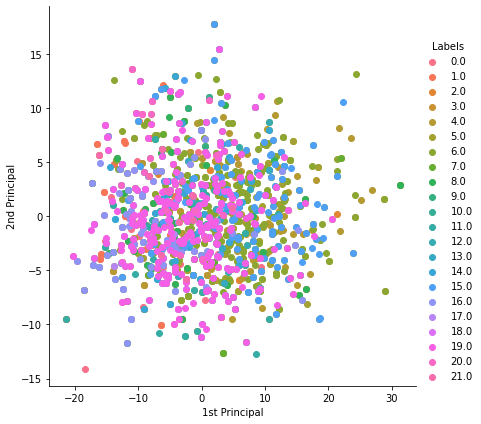

In [26]:
sn.FacetGrid(pca_df, hue='Labels', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()